In [2]:
import pandas as pd
data = pd.read_csv('NationalNames.csv')
# Виведення останніх 8 рядків
print(data.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [3]:

data_info = data.info()
print("Загальна інформація про дані:")
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB
Загальна інформація про дані:
None


In [4]:

unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()
unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()

print("Кількість унікальних жіночих імен:", unique_female_names)
print("Кількість унікальних чоловічих імен:", unique_male_names)


Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199


In [5]:

data_2010_male = data[(data['Year'] == 2010) & (data['Gender'] == 'M')]
top_5_male_names = data_2010_male.groupby('Name')['Count'].sum().nlargest(5)
print("5 найпопулярніших чоловічих імен у 2010 році:")
print(top_5_male_names)


5 найпопулярніших чоловічих імен у 2010 році:
Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [6]:

min_count = data['Count'].min()
min_count_records = data[data['Count'] == min_count].shape[0]
print("Кількість записів з мінімальним значенням Count:", min_count_records)


Кількість записів з мінімальним значенням Count: 254615


In [7]:

unique_names_per_year = data.groupby('Year')['Name'].nunique()
print("Кількість унікальних імен у кожному році:")
print(unique_names_per_year)


Кількість унікальних імен у кожному році:
Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [8]:

births_per_year = data.groupby('Year')['Count'].sum()
print("Загальна кількість народжень за рік:")
print(births_per_year)


Загальна кількість народжень за рік:
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [9]:

year_with_most_births = births_per_year.idxmax()
print("Рік, коли народилося найбільше дітей:", year_with_most_births)


Рік, коли народилося найбільше дітей: 1957


In [10]:

gender_births_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("Кількість дівчаток та хлопчиків, які народились кожного року:")
print(gender_births_per_year)


Кількість дівчаток та хлопчиків, які народились кожного року:
Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [11]:

years_more_females = (gender_births_per_year['F'] > gender_births_per_year['M']).sum()
print("Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків:", years_more_females)


Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: 54


In [12]:

neutral_names = data.groupby('Name')['Gender'].nunique().eq(2)
neutral_names_list = neutral_names[neutral_names].index
num_neutral_names = len(neutral_names_list)
print("Кількість гендерно-нейтральних імен:", num_neutral_names)


Кількість гендерно-нейтральних імен: 10221


In [13]:

barbara_male_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()
print("Кількість разів, коли хлопчиків називали Barbara:", barbara_male_count)


Кількість разів, коли хлопчиків називали Barbara: 4139


In [14]:

num_years = data['Year'].nunique()
print("Кількість років спостереження:", num_years)


Кількість років спостереження: 135


In [15]:

all_years = data['Year'].nunique()
neutral_names_all_years = data[data['Name'].isin(neutral_names_list)]
names_every_year = neutral_names_all_years.groupby('Name')['Year'].nunique()
popular_neutral_names = names_every_year[names_every_year == all_years].index

print("Найпопулярніші гендерно-нейтральні імена, присутні кожного року:")
print(popular_neutral_names)


Найпопулярніші гендерно-нейтральні імена, присутні кожного року:
Index(['Aaron', 'Abbie', 'Abel', 'Abigail', 'Abraham', 'Ada', 'Adam', 'Addie',
       'Addison', 'Adele',
       ...
       'Williams', 'Willie', 'Willis', 'Wilma', 'Wilmer', 'Wilson', 'Winifred',
       'Winnie', 'Wyatt', 'Zoe'],
      dtype='object', name='Name', length=823)


In [16]:

name_counts = data.groupby('Name')['Count'].sum()
least_popular_name = name_counts.nsmallest(1).idxmax()
print("Найпопулярніше серед непопулярних імен:", least_popular_name)


Найпопулярніше серед непопулярних імен: Aabid


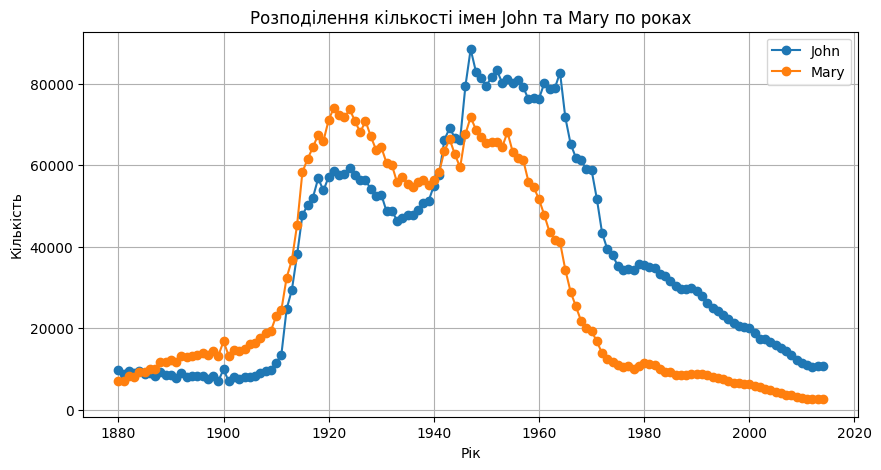

In [17]:
import matplotlib.pyplot as plt
john_data = data[data['Name'] == 'John'].groupby('Year')['Count'].sum()
mary_data = data[data['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 5))
plt.plot(john_data.index, john_data.values, label="John", marker='o')
plt.plot(mary_data.index, mary_data.values, label="Mary", marker='o')
plt.title("Розподілення кількості імен John та Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()
plt.grid(visible=True)
plt.show()


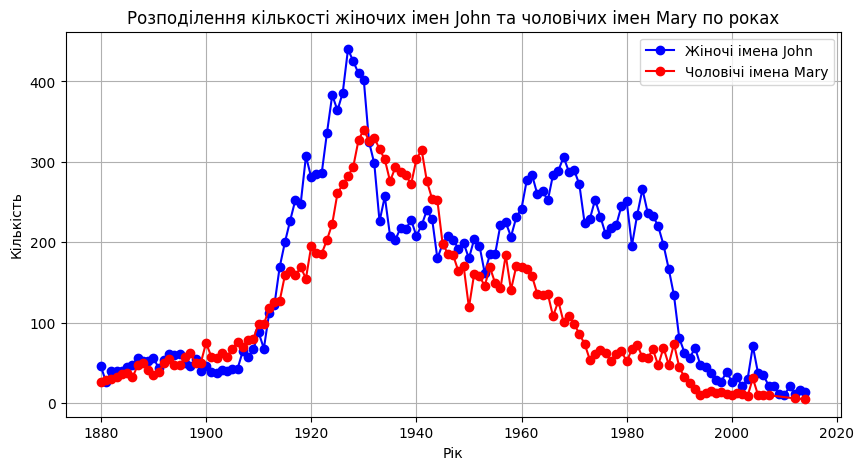

In [18]:
import matplotlib.pyplot as plt

# Фільтруємо дані для жіночих імен John і чоловічих імен Mary
female_john_data = data[(data['Name'] == 'John') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum()
male_mary_data = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')].groupby('Year')['Count'].sum()

# Побудова графіків
plt.figure(figsize=(10, 5))
plt.plot(female_john_data.index, female_john_data.values, label="Жіночі імена John", marker='o', color='blue')
plt.plot(male_mary_data.index, male_mary_data.values, label="Чоловічі імена Mary", marker='o', color='red')
plt.title("Розподілення кількості жіночих імен John та чоловічих імен Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()
plt.grid(visible=True)
plt.show()


In [19]:
# Групування за роком і вибір імені з максимальним Count для кожного року
popular_names_each_year = data.loc[data.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]
print("Найпопулярніші імена в кожному році:")
print(popular_names_each_year)


Найпопулярніші імена в кожному році:
         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
